In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [6]:
data = np.genfromtxt('../data/advertising.csv', delimiter= ',', skip_header= 1)
X= data[:, :3]
y= data[:, 3:]
X.shape


(200, 3)

In [7]:
n_samples, n_features = X.shape

In [ ]:
n_epochs = 50

losses = []
X_b = np.hstack([np.ones((n_samples, 1)), X])

In [22]:
theta = np.random.randn(4,1)

In [23]:
theta.shape

(4, 1)

In [24]:
X_b.shape

(200, 4)

In [25]:
X_b[0]

array([  1. , 230.1,  37.8,  69.2])

In [26]:
predict= X_b@theta

In [28]:
print(f"predict shape: {predict.shape}, y_shape: {y.shape}")

predict shape: (200, 1), y_shape: (200, 1)


In [31]:
print(f"y_hat- y: {(predict- y).shape}")

y_hat- y: (200, 1)


In [40]:
eps = 1e-10
delta = 0.1
lr = 0.00009
for epoch in range(n_epochs):
    y_hat = X_b @ theta
    residual = (y - y_hat)
    abs_r = np.abs(residual)
    hubber_loss = np.where(abs_r <= delta, 0.5*residual**2, delta*(abs_r - 0.5*delta))
    loss = (1/n_samples)*hubber_loss.sum()
    losses.append(loss)
    k= np.where(abs_r <= delta, residual, delta*residual/(abs_r+eps))
    gradient = -(X_b.T @ k)/n_samples
    theta = theta - lr*gradient



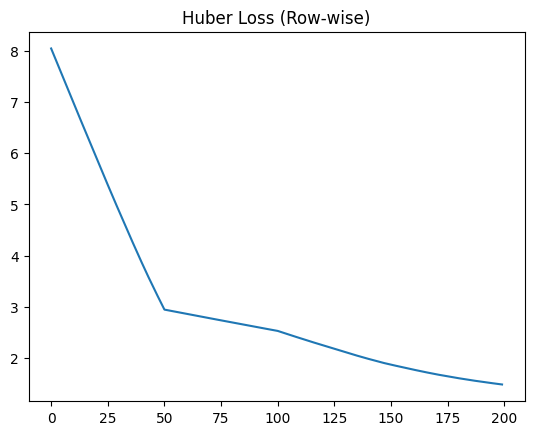

In [41]:
plt.plot(losses)
plt.title("Huber Loss (Row-wise)")
plt.show()